# Case study on Supervised learning

### Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

## Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## About iris dataset

The iris dataset contains the following data
* 50 samples of 3 different species of iris (150 samples total)
* Measurements: sepal length, sepal width, petal length, petal width

# 1. Read the dataset to the python environment.

In [2]:
data = pd.read_excel("iris (3).xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

### Findings

1. This dataset contain 150 rows and 5 columns. 

2. Dataset contain both categorical and numerical features.
   * Categorical features : Classification
   * Continous : SL, SW, PL, PW

4. SL, SW, PL  features contain number of null values in the dataset.

5. Four features are floats data types. one feature is string(object)

### Statistical details

In [9]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

In [11]:
group_names = data['Classification'].unique().tolist()
group_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Data Visualization

<AxesSubplot:xlabel='Classification', ylabel='PL'>

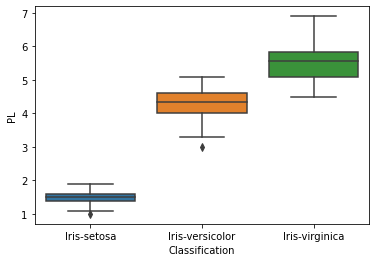

In [12]:
sns.boxplot(x='Classification', y='PL', data=data)

<AxesSubplot:xlabel='Classification', ylabel='PW'>

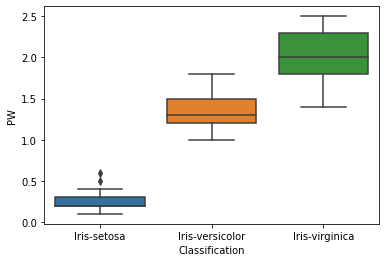

In [13]:
sns.boxplot(x='Classification', y='PW', data=data)

<AxesSubplot:xlabel='Classification', ylabel='SL'>

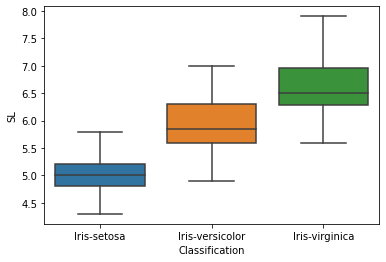

In [14]:
sns.boxplot(x='Classification', y='SL', data=data)

<AxesSubplot:xlabel='Classification', ylabel='SW'>

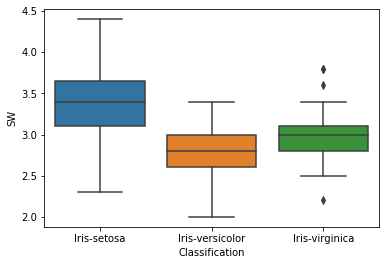

In [15]:
sns.boxplot(x='Classification', y='SW', data=data)

## SepalLength vs SepalWidth

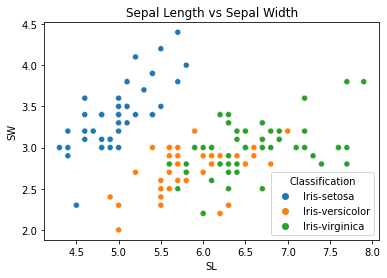

In [16]:
sns.scatterplot(x = 'SL', y = 'SW', data = data, hue = 'Classification')
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [17]:
data['SL'].corr(data['SW'])

-0.10251071603899589

### Findings

We can see that there is a lot of correlation in Iris-Setosa category when it comes to Sepal Length and 
SepalWidth but not a similar distinction for the other two categories. The correlation does not seem very strong either.

## PetalLength vs PetalWidth

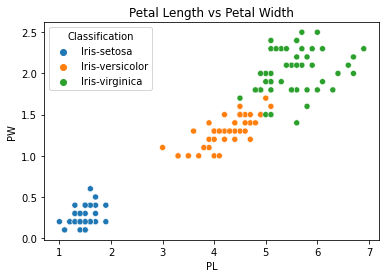

In [18]:
sns.scatterplot(x = 'PL', y = 'PW', data = data, hue = 'Classification')
plt.title('Petal Length vs Petal Width')
plt.show()

## pairplot for iris dataset

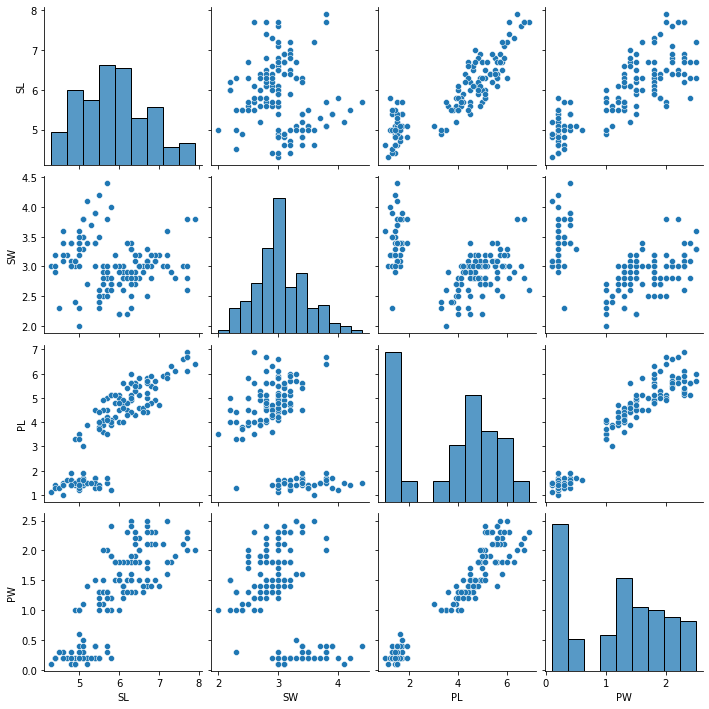

In [19]:
sns.pairplot(data)

In [20]:
data.corr()

,SL,SW,PL,PW
SL,1.000000,-0.102511,0.873444,0.821584
SW,-0.102511,1.000000,-0.428465,-0.346900
PL,0.873444,-0.428465,1.000000,0.961679
PW,0.821584,-0.346900,0.961679,1.000000


<AxesSubplot:>

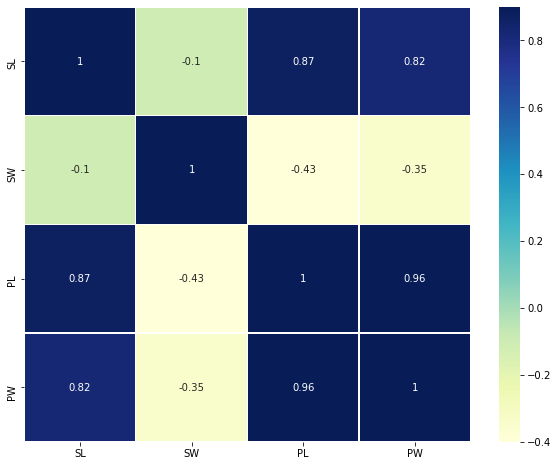

In [21]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=0.9, annot=True, linewidth=0.2, cmap='YlGnBu')

# 2. Do necessary pre-processing steps.

## Handling missing values

### Visualizing the missing values

<AxesSubplot:>

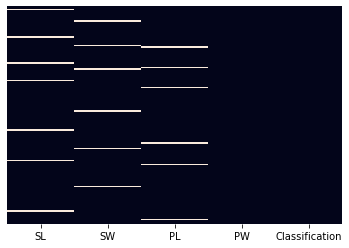

In [22]:
sns.heatmap(data.isnull(),yticklabels = False, cbar = False)

### Histogram of float datatype features

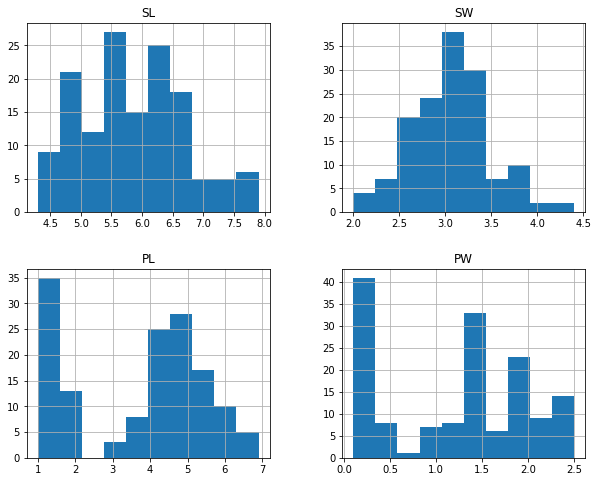

In [23]:
fraqgraph = data.select_dtypes(include=["float"])
fraqgraph.hist(figsize=(10,8))
plt.show()

### Data Filling

In [24]:
data['SL'] = data['SL'].fillna(data['SL'].median())

In [25]:
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [26]:
data['SW'] = data['SW'].fillna(data['SW'].median())

In [27]:
data.isna().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

In [28]:
data['PL'] = data['PL'].fillna(data['PL'].median())

In [29]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [30]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [31]:
data['Classification'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Classification, dtype: int64

# Checking and handling outliers

## Checking and handling outliers in sepal length(SL)

Text(0.5, 1.0, 'Box plot of Sepal Length')

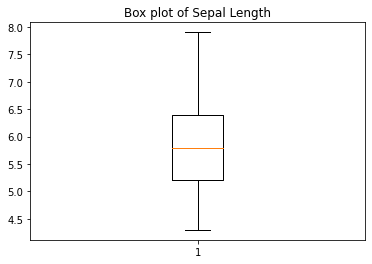

In [32]:
plt.boxplot(data['SL'])
plt.title('Box plot of Sepal Length')

No outliers found

## Checking and handling outliers in sepal width(SW)

Text(0.5, 1.0, 'Box plot of Sepal Width')

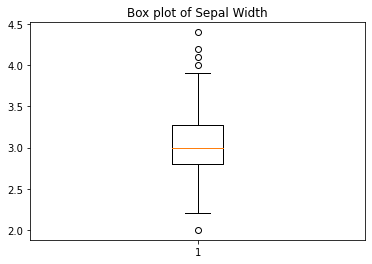

In [33]:
plt.boxplot(data['SW'])
plt.title('Box plot of Sepal Width')

Finding different quartile values of Sepal width(SW)

In [34]:
Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')

In [35]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [36]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ", low_lim)
print("Upper limit = ", up_lim)

Lower limit =  2.1249999999999996
Upper limit =  3.9250000000000003


Removing values which lessthan and greater than the upper limit and lower limit

In [37]:
outlier = []
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

Finding the index of these values

In [38]:
ind1 = data['SW']>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [39]:
data.drop([14, 15, 32, 33], inplace = True)

Text(0.5, 1.0, 'Box plot of Sepal width after handling outliers')

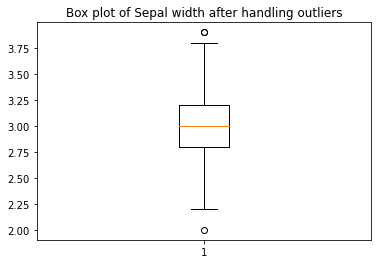

In [40]:
plt.boxplot(data['SW'])
plt.title('Box plot of Sepal width after handling outliers')

## Checking and handling outliers in Petal width(PL)

Text(0.5, 1.0, 'Box plot of Petal Length')

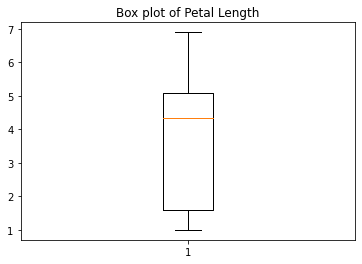

In [41]:
plt.boxplot(data['PL'])
plt.title('Box plot of Petal Length')

No outliers found

## Checking and handling outliers in Petal Width(PW)

Text(0.5, 1.0, 'Box plot of Petal Length')

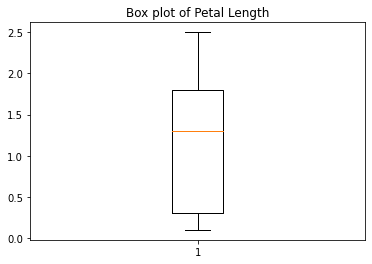

In [42]:
plt.boxplot(data['PW'])
plt.title('Box plot of Petal Length')

No outliers found

In [46]:
data.shape

(146, 5)

## Data transformation for model use

## Label Encoding

In [47]:
data['Classification']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 146, dtype: object

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
data['Classification'] = le.fit_transform(data["Classification"])
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [50]:
data['Classification'].unique()

array([0, 1, 2])

###  Iris-setosa is represented as 0, Iris-versicolor is represented as 1 and Iris-virginica is represented as 2 in label encoding.

## SPLITTING DATA

In [51]:
from sklearn.model_selection import train_test_split

x = data.drop('Classification', axis = 1)
y = data['Classification']
x_train, x_test, y_train, y_test =train_test_split(x, y,test_size =0.3,random_state=2)

In [52]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)

In [53]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.04588433032397288


In [54]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,predictions))

R squared value is : 0.9327029821915065


## Standard scaling

In [55]:
x = data.drop('Classification', axis = 1)

In [56]:
x.describe()

,SL,SW,PL,PW
count,146.000000,146.000000,146.000000,146.000000
mean,5.861644,3.016438,3.845205,1.225342
std,0.817166,0.382555,1.706593,0.755834
min,4.300000,2.000000,1.000000,0.100000
25%,5.125000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [57]:
from sklearn import preprocessing

In [58]:
standardisation = preprocessing.StandardScaler()
x = standardisation.fit_transform(x)

In [59]:
x = pd.DataFrame(x)
x.describe()

,0,1,2,3
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02
mean,4.332056e-16,6.602405e-16,4.646207e-16,-6.661338e-16
std,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00
min,-1.917627e+00,-2.666117e+00,-1.672924e+00,-1.494001e+00
25%,-9.045650e-01,-5.677176e-01,-1.320136e+00,-1.228482e+00
50%,-7.569581e-02,-4.311779e-02,2.968090e-01,9.911512e-02
75%,6.610768e-01,4.814820e-01,7.377939e-01,7.629136e-01
max,2.503008e+00,2.317581e+00,1.796158e+00,1.692232e+00


In [60]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)


In [61]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,predictions))

MSE is: 0.04588433032397288
R squared value is : 0.9327029821915065


## Min max scaling

In [62]:
x = data.drop("Classification", axis =1)

In [63]:
x.describe()

,SL,SW,PL,PW
count,146.000000,146.000000,146.000000,146.000000
mean,5.861644,3.016438,3.845205,1.225342
std,0.817166,0.382555,1.706593,0.755834
min,4.300000,2.000000,1.000000,0.100000
25%,5.125000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [64]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [65]:
x = min_max.fit_transform(x)

In [66]:
x = pd.DataFrame(x)

In [67]:
x.describe()

,0,1,2,3
count,146.000000,146.000000,146.000000,146.000000
mean,0.433790,0.534968,0.482238,0.468893
std,0.226991,0.201345,0.289253,0.314931
min,0.000000,0.000000,0.000000,0.000000
25%,0.229167,0.421053,0.101695,0.083333
50%,0.416667,0.526316,0.567797,0.500000
75%,0.583333,0.631579,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is :', r2_score(y_test,predictions))

MSE is: 0.045884330323972836
R squared value is : 0.9327029821915065


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

## Logistic regression

In [69]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

In [71]:
print("Accuracy is:" ,accuracy_score(y_test, y_pred)*100)
print("Precision is:", precision_score(y_test, y_pred,pos_label="positive",average='macro'))
print("Recall is:", recall_score(y_test, y_pred,pos_label="positive",average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,pos_label="positive",average='macro'))



Accuracy is: 95.45454545454545
Precision is: 0.9607843137254902
Recall is: 0.9523809523809524
f1 score is: 0.953525641025641


For a good model accuracy and f1 score should be maximum possible, here accuracy is 95%

In [72]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 15]], dtype=int64)

## KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
#creating an empty list to get varried k values
acc_values = []
neighbors = np.arange(3,15)
# creating a loop for each knn value
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k, metric ="minkowski")
    Classifier.fit(x_train, y_train)
    y_pred = Classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)


In [74]:
acc_values

[0.9772727272727273,
 0.9772727272727273,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9772727272727273,
 1.0,
 1.0,
 1.0,
 0.9772727272727273]

## plotting a graph b/w k value(neighbor) and accuracy

Text(0, 0.5, 'Accuracy')

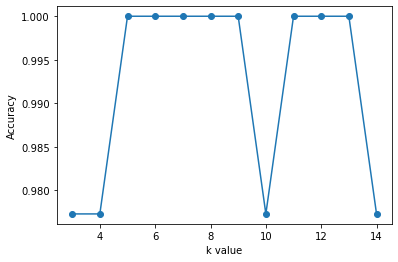

In [75]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel("Accuracy")

In [76]:
Classifier = KNeighborsClassifier(n_neighbors = 5, metric ="minkowski")
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test) 

In [77]:
print("Accuracy is:" ,accuracy_score(y_test, y_pred)*100)
print("Precision is:", precision_score(y_test, y_pred,pos_label="positive",average='macro'))
print("Recall is:", recall_score(y_test, y_pred,pos_label="positive",average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,pos_label="positive",average='macro'))


Accuracy is: 100.0
Precision is: 1.0
Recall is: 1.0
f1 score is: 1.0


Here we have 100% accuracy

In [78]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 15]], dtype=int64)

## Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt_model = DecisionTreeClassifier()

In [81]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [82]:
y_pred = dt_model.predict(x_test)

In [83]:
print("Accuracy on Decision tree model is:" , accuracy_score(y_test, y_pred)*100)

Accuracy on Decision tree model is: 97.72727272727273


In [84]:
y_test.value_counts()

0    15
2    15
1    14
Name: Classification, dtype: int64

In [85]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 14]], dtype=int64)

# SVM(Support Vector Machine)

## Linear SVM

In [86]:
from sklearn.svm import SVC

In [87]:
svm_linear = SVC(kernel = 'linear')

In [88]:
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [89]:
y_pred = svm_linear.predict(x_test)

In [90]:
print("Accuracy using linear svm is:" , accuracy_score(y_test, y_pred)*100)

Accuracy using linear svm is: 100.0


## Standardizing the features

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fitting standard scaling on x_train and x_test
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [92]:
svm_linear = SVC(kernel = 'linear')

In [93]:
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [94]:
y_pred = svm_linear.predict(x_test)

In [95]:
print("Accuracy  is:" , accuracy_score(y_test, y_pred)*100)

Accuracy  is: 97.72727272727273


## Ploynomial SVM

In [96]:
svm_poly = SVC(kernel = 'poly',degree=3)

In [97]:
svm_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [98]:
y_pred = svm_poly.predict(x_test)

In [99]:
print("Accuracy  is:" , accuracy_score(y_test, y_pred)*100)

Accuracy  is: 93.18181818181817


## Radial SVM

In [100]:
svm_radial = SVC(kernel ="rbf")

In [101]:
svm_radial.fit(x_train,y_train)

SVC()

In [102]:
y_pred = svm_radial.predict(x_test)

In [103]:
print("Accuracy  is:" , accuracy_score(y_test, y_pred)*100)

Accuracy  is: 100.0


## Random Forest Algorithm

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [105]:
from sklearn.metrics import f1_score,confusion_matrix
print("Accuracy is:" ,accuracy_score(y_test, y_pred)*100)
print("f1 score is:", f1_score(y_test, y_pred,pos_label="positive",average='macro'))



Accuracy is: 100.0
f1 score is: 1.0


### Findings

   1. KNN(K nearest neighbor), SVM linear, SVM Radial and Random forest classification model gives the 100% accuracy in 
      predicting the iris species.
   2. Decision tree model gives 97% accuracy and polynomial SVM gives 93% of accuracy in predicting the iris species.